### Data Model Evaluation

In [ ]:
# Required package.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [60]:
def load_dataset(path):
    """Read pickle.

    Args:
        path (str): The full dataset file.

    Returns:
        dataset (dataframe):
    """

    return pd.read_csv(path)


def plot_train_test_scores(scores):
    import matplotlib
    matplotlib.style.use('default')
    
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation=90)
    fig.suptitle("Feature Extraction Method Comparison in Train Phase")
    scores.boxplot(column=["train_scores"], by="vectorizer", grid=False, ax=ax)
    ax.set_ylabel("F1-score")
    ax.set_xlabel("Feature Extraction Methods")
    plt.show()

    fig, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation=90)
    plt.ylim(0.0, 2.0)
    fig.suptitle("Feature Extraction Method Comparison in Train Phase")
    scores.boxplot(column=["train_times"], by="vectorizer", grid=False, ax=ax)
    ax.set_ylabel("Fit Mean Time (s)")
    ax.set_xlabel("Feature Extraction Methods")
    plt.show()

    fig, ax = plt.subplots(figsize=(20, 10))
    fig.suptitle("Feature Extraction Method Comparison in Test Step")
    scores[["vectorizer", "test_score"]].drop_duplicates().plot.bar(
        y="test_score", x="vectorizer", legend=False, table=True, ax=ax
    )
    ax.set_ylabel("F1-score")
    ax.set_xlabel("")
    ax.set_xticks([])
   
    plt.show()


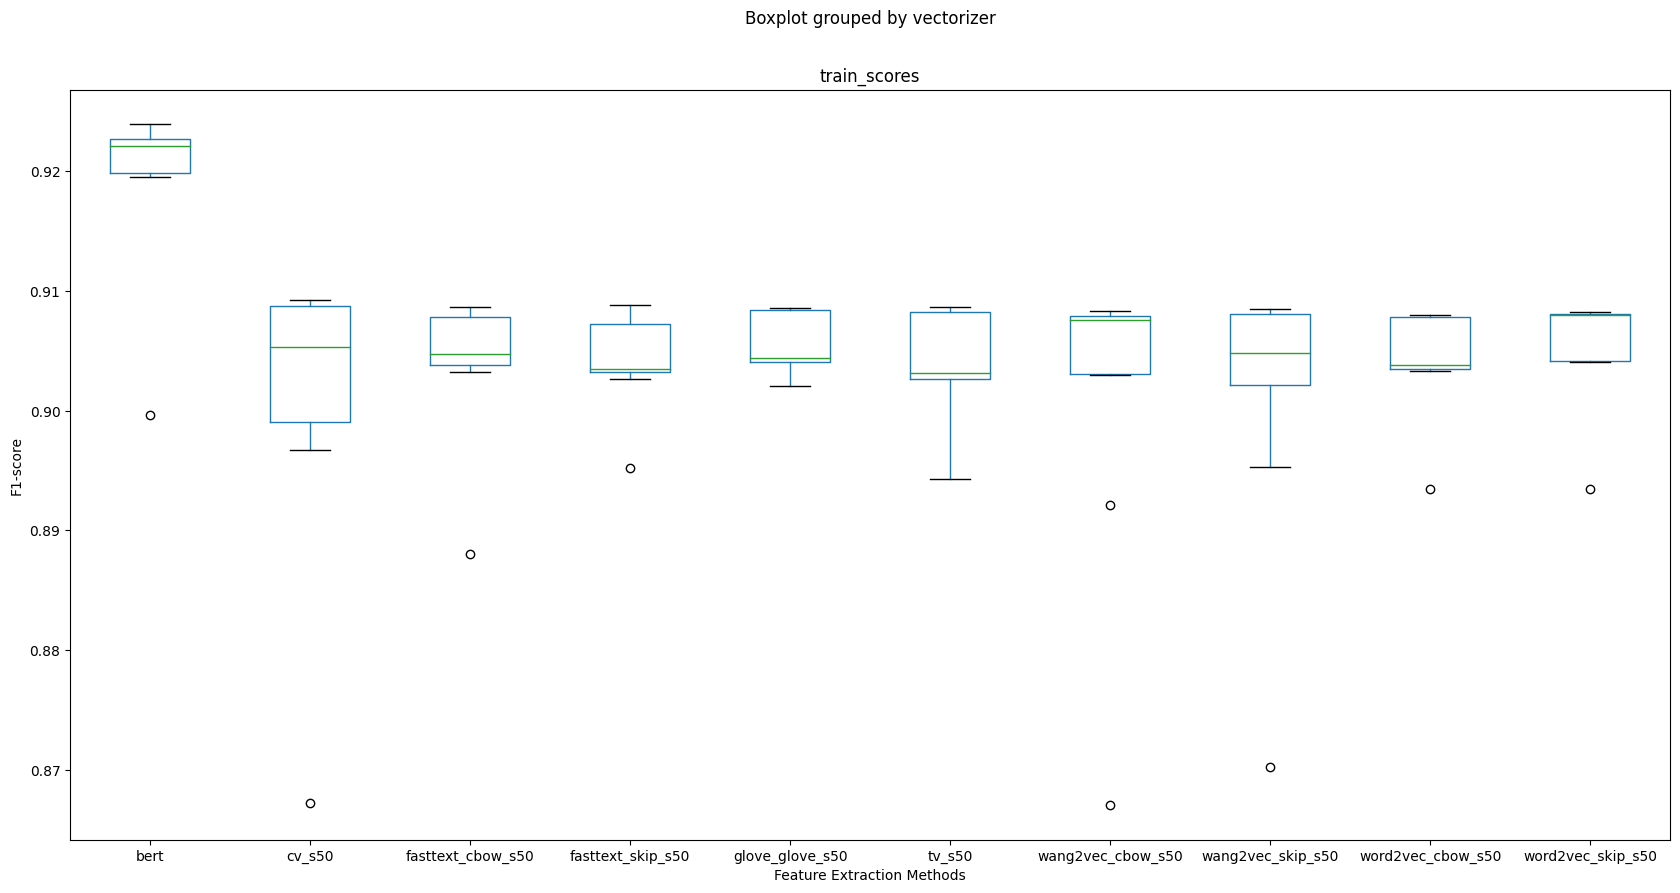

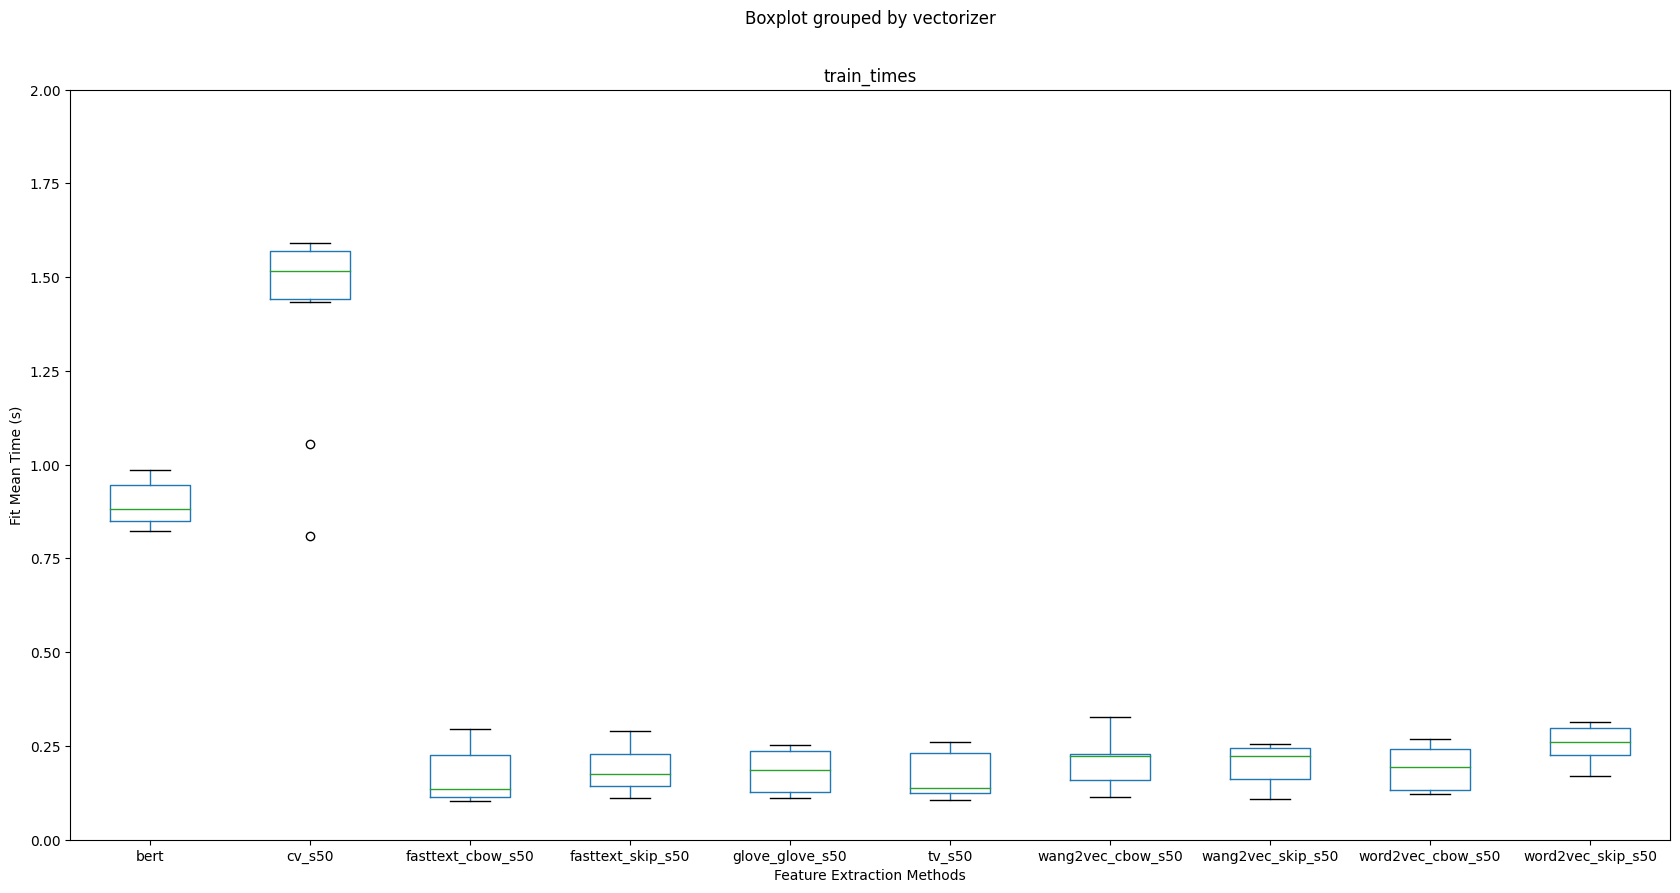

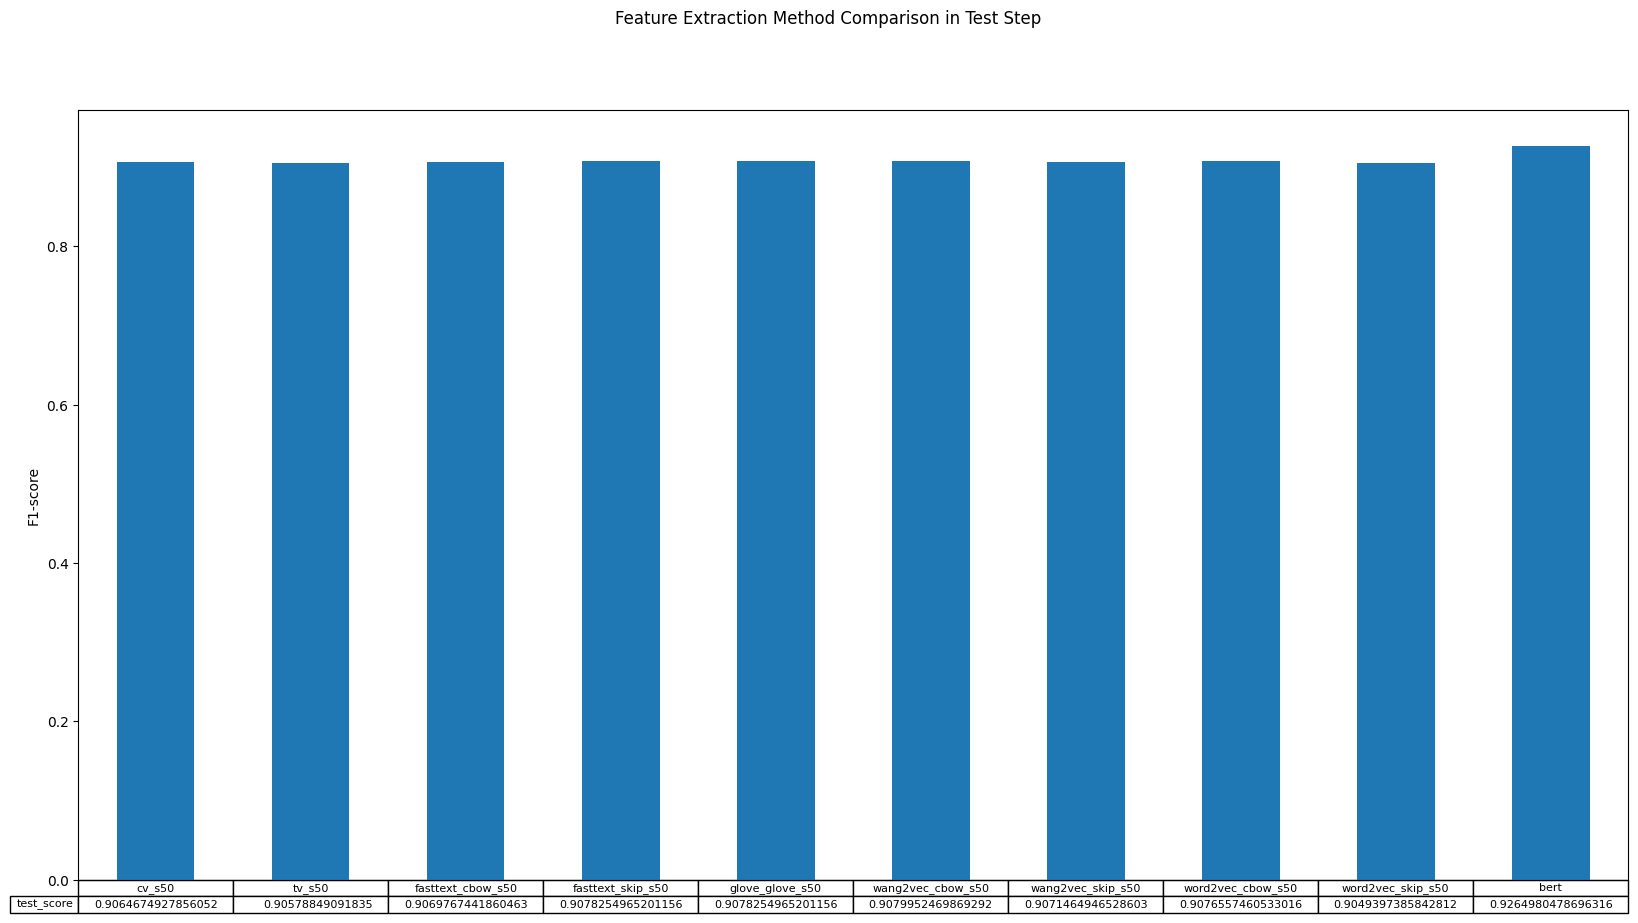

In [61]:
# read results
scores = load_dataset("../data/deployed/20221205_results.csv")
plot_train_test_scores(scores)

In [25]:
vectorizers

array(['cv_s50', 'tv_s50', 'fasttext_cbow_s50', 'fasttext_skip_s50',
       'glove_glove_s50', 'wang2vec_cbow_s50', 'wang2vec_skip_s50',
       'word2vec_cbow_s50', 'word2vec_skip_s50', 'bert'], dtype=object)

In [26]:
train_scores

0     0.897750
1     0.908913
2     0.903650
3     0.909041
4     0.903098
        ...   
95    0.899660
96    0.922411
97    0.922750
98    0.920119
99    0.919567
Name: train_scores, Length: 96, dtype: float64

In [8]:
dataframe.head()

,vectorizer,train_scores,train_times,test_score
0,cv_s50,0.897750,1.494852,0.906467
1,cv_s50,0.908913,1.589614,0.906467
2,cv_s50,0.903650,1.434547,0.906467
3,cv_s50,0.909041,1.580011,0.906467
4,cv_s50,0.903098,1.457487,0.906467


In [15]:
dataframe['vectorizer'].unique()
dataframe[['vectorizer', 'train_scores']].drop_duplicates()["train_scores"]
dataframe[['vectorizer', 'train_times']].drop_duplicates()["train_times"]
dataframe[['vectorizer', 'test_score']].drop_duplicates()["test_score"]


0     0.906467
10    0.905788
20    0.906977
30    0.907825
40    0.907825
50    0.907995
60    0.907146
70    0.907656
80    0.904940
90    0.926498
Name: test_score, dtype: float64